In [227]:
#Predicting whether the Deoartment of Sanitation in New York City will take action or not take action regarding snow complaints.
#The data used was NYC 311 complaints data filtered to only include snow complaints from 2010 -2018 
#Intially the dataset included 80,000+ rows. After filtering rows with missing data this number was reduced to 
#approximately 54,000. Giving the time sensitive nature of snow actually remaining on the ground records witha response time of 
#greater than 17 days were removed. Since it is almost a certainty that no action would/could be taken regarding the original
#complaint.The columns Agency Name,Borough,Closed Date,Created Date, Cross Street 1, Cross Street 2, Descriptor, 
#Location Type, Resolution, Action Updated Date, Resolution Description,Status, Street Name, and Unique Key were removed. 
#Cross Street 2 was removed due the perfect correlation with Cross Street 1. Street Name was removed due to its lack of 
#importance in this calculation. Research done while conducting the data indicated that the Borough and the Community Board 
#represented a greater significance to the action taken. Also keeping the street name would require 
#further data processing and transformation with minimal gained benefit. To create the model of action (not) taken 6 columns
#were used: Borough, Days Needed to Resolve Complaint, Community Board, Descriptor, Action Taken, Open Data Channel Type.


In [279]:
#Python libraries tested or used
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score
import mglearn
import warnings
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [229]:
#311 snow complaint record
data = pd.read_csv('snow_311.csv')

In [230]:
print(data.columns)

Index(['Borough', 'Days Needed to Resolve Complaint', 'Community Board',
       'Descriptor', 'Action Taken', 'Open Data Channel Type'],
      dtype='object')


In [231]:
print(data.shape)

(51477, 6)


In [232]:
#Drop performed to ensure no rows were kept with missing data
data.dropna()

,Borough,Days Needed to Resolve Complaint,Community Board,Descriptor,Action Taken,Open Data Channel Type
0,BRONX,1,02 BRONX,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
1,BROOKLYN,0,05 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
2,BROOKLYN,1,15 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
3,QUEENS,0,01 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
4,QUEENS,0,05 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
5,QUEENS,0,11 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
6,QUEENS,0,13 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
7,STATEN ISLAND,0,02 STATEN ISLAND,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
8,BRONX,1,06 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE
9,BRONX,2,10 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE


In [233]:
data.dtypes
cat_columns = data.columns
cat_columns

Index(['Borough', 'Days Needed to Resolve Complaint', 'Community Board',
       'Descriptor', 'Action Taken', 'Open Data Channel Type'],
      dtype='object')

In [234]:
data['Borough'] = data['Borough'].astype('category')
data['Community Board'] = data['Community Board'].astype('category')
data['Descriptor'] = data['Descriptor'].astype('category')
data['Open Data Channel Type'] = data['Open Data Channel Type'].astype('category')
data['Action Taken'] = data['Action Taken'].astype('category')
data['Days Needed to Resolve Complaint'] = data['Days Needed to Resolve Complaint'].astype('category')
data.dtypes


Borough                             category
Days Needed to Resolve Complaint    category
Community Board                     category
Descriptor                          category
Action Taken                        category
Open Data Channel Type              category
dtype: object

In [235]:
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
for name in cat_columns:
    data[name] = data[name].astype('category')
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [236]:
data.dtypes

Borough                             int8
Days Needed to Resolve Complaint    int8
Community Board                     int8
Descriptor                          int8
Action Taken                        int8
Open Data Channel Type              int8
dtype: object

In [237]:
features = ['Days Needed to Resolve Complaint', 'Community Board','Borough', 
       'Descriptor',  'Open Data Channel Type']
xStandard = data.loc[:, features].values
yStandard = data.loc[:,['Action Taken']].values
xStandard = StandardScaler().fit_transform(xStandard)
pd.DataFrame(data = xStandard, columns = features).head()

,Days Needed to Resolve Complaint,Community Board,Borough,Descriptor,Open Data Channel Type
0,-0.726185,-1.422916,-1.561529,-1.322977,-1.186284
1,-0.959796,-0.581034,-0.783153,-1.322977,-1.186284
2,-0.726185,1.383355,-0.783153,-1.322977,-1.186284
3,-0.959796,-1.535166,0.773597,-1.322977,-1.186284
4,-0.959796,-0.468784,0.773597,-1.322977,-1.186284


In [238]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(xStandard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

principalDf.head(5)


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.643348,-0.060578,1.847441,1.627110,1.292227
1,-0.905228,0.066167,1.781540,0.598521,0.820822
2,-0.577400,1.437040,1.684855,-0.771002,0.616626
3,-1.396007,-1.606625,1.431058,0.227509,0.635741
4,-1.294889,-0.848569,1.435168,-0.491115,0.446371


In [239]:
finalDf = pd.concat([principalDf, data[['Action Taken']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Action Taken
0,-0.643348,-0.060578,1.847441,1.627110,1.292227,1
1,-0.905228,0.066167,1.781540,0.598521,0.820822,0
2,-0.577400,1.437040,1.684855,-0.771002,0.616626,1
3,-1.396007,-1.606625,1.431058,0.227509,0.635741,0
4,-1.294889,-0.848569,1.435168,-0.491115,0.446371,0


In [240]:
pca.explained_variance_ratio_

array([0.33191781, 0.26647378, 0.18315057, 0.13125233, 0.08720552])

#  Maintaining 95% of the variance

Utilizing the PCA to determine the number of features required to maintain 95% of the variance, It was determined that the data setis already at the optimal number of features.

In [241]:
yy = data['Action Taken']
yy = yy.astype('category')
y = pd.DataFrame(yy, columns = ['Action Taken'])
del data['Action Taken']

Text(0, 0.5, 'Second principal component')

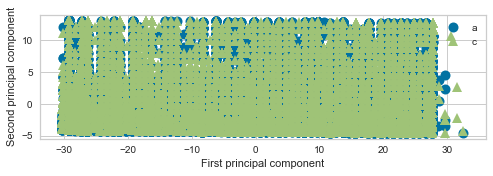

In [242]:
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(data)

# transform data onto the first two principal components
X_pca1 = pca1.transform(data)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], yy)
plt.legend("action Taken", loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

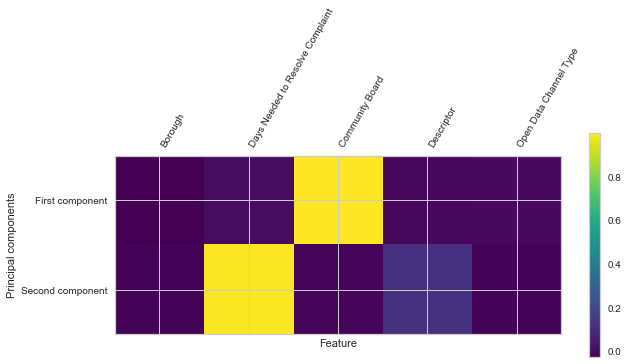

In [243]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data.columns)),
           data, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [244]:
scaler = StandardScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)

Text(0, 0.5, 'Second principal component')

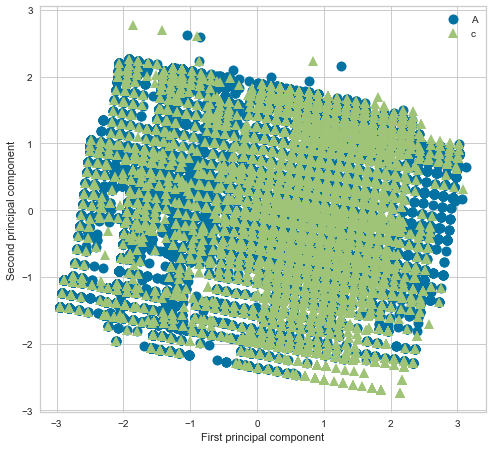

In [245]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], yy)
plt.legend("Action Taken", loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

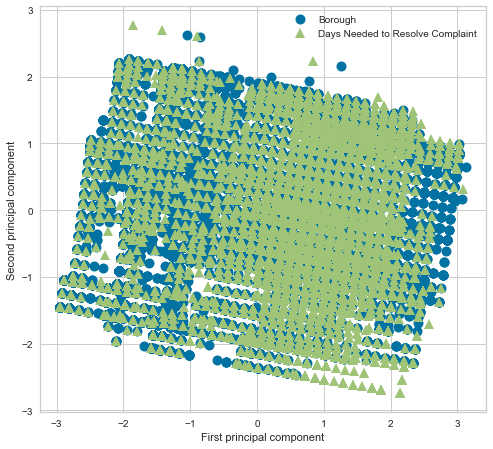

In [246]:
# keep the first two principal components of the data
pca2 = PCA(n_components=5)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], yy)
plt.legend(data.columns, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

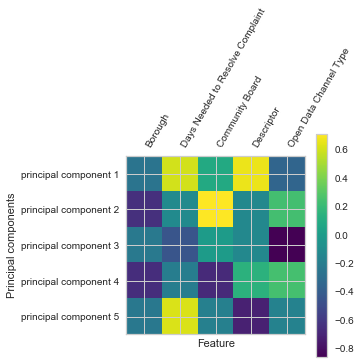

In [247]:

plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0,1,2,3,4], ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

plt.colorbar()
plt.xticks(range(len(data.columns)),
           data.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [248]:
db = DBSCAN(eps=3, min_samples=2).fit(X_pca2)
db.labels_
db

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [214]:
clustering = AgglomerativeClustering().fit(X_pca2)
clustering
clustering.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify = y, test_size=0.25, random_state=42)
XPCA_train, XPCA_test, yPCA_train, yPCA_test = train_test_split(principalDf, y, stratify = y, test_size=0.25, random_state=42)


## KMean Without PCA

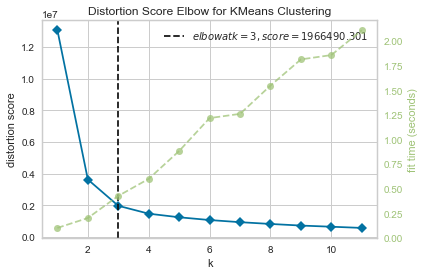

In [262]:
model1 = KMeans(n_clusters=k)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [331]:
model1.fit(X_train)
y_pred= model1.predict(X_test)

In [332]:
range_n_clusters = [1,2, 3, 4, 5, 6,7,8,9,10,11,12]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_test)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_test, y_pred)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 1 The average silhouette_score is : 0.3384578953776357
For n_clusters = 2 The average silhouette_score is : 0.3384578953776357
For n_clusters = 3 The average silhouette_score is : 0.3384578953776357
For n_clusters = 4 The average silhouette_score is : 0.3384578953776357
For n_clusters = 5 The average silhouette_score is : 0.3384578953776357
For n_clusters = 6 The average silhouette_score is : 0.3384578953776357
For n_clusters = 7 The average silhouette_score is : 0.3384578953776357
For n_clusters = 8 The average silhouette_score is : 0.3384578953776357
For n_clusters = 9 The average silhouette_score is : 0.3384578953776357
For n_clusters = 10 The average silhouette_score is : 0.3384578953776357
For n_clusters = 11 The average silhouette_score is : 0.3384578953776357
For n_clusters = 12 The average silhouette_score is : 0.3384578953776357


# KMean With PCA

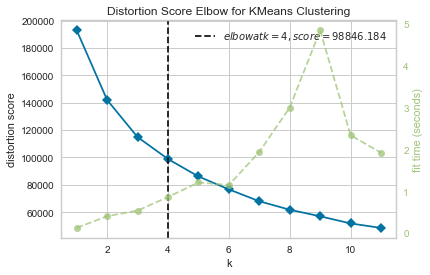

In [267]:

# Instantiate the clustering model and visualizer
model2 = KMeans(n_clusters=k)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(XPCA_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Aggolmerate/Hierarchical With PCA

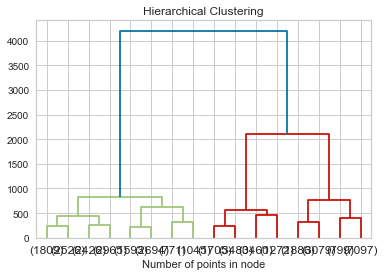

In [327]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model4 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model4 = model4.fit(X_train,y_train)
plt.title('Hierarchical Clustering')
# plot the top three levels of the dendrogram
plot_dendrogram(model4, truncate_mode='level', p=3)
plt.xlabel("Number of points in node")
plt.show()

In [329]:
X = X_train.values
yy = y_train['Action Taken']
labels= model4.labels_
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(yy, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(yy, labels))

Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


## Aggolmerate/Hierarchical With PCA

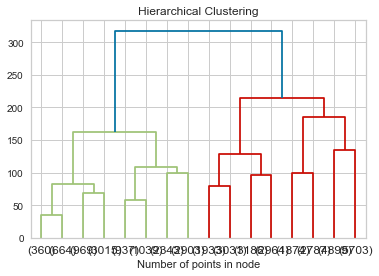

In [323]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=3)

model3 = model.fit(XPCA_train,yPCA_train)
plt.title('Hierarchical Clustering')
# plot the top three levels of the dendrogram
plot_dendrogram(model3, truncate_mode='level', p=3)
plt.xlabel("Number of points in node")
plt.show()

In [326]:
X = XPCA_train.values
yy = yPCA_train['Action Taken']
labels= model3.labels_
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(yy, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(yy, labels))

Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


## DBSCAN With PCA

Estimated number of clusters: 44
Estimated number of noise points: 370
Homogeneity: 0.355
Completeness: 0.084
V-measure: 0.136
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.014


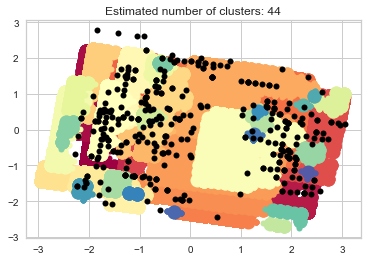

In [310]:
X = XPCA_train.values
yy = yPCA_train['Action Taken']

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(yy, labels))
print("Completeness: %0.3f" % metrics.completeness_score(yy, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(yy, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(yy, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(yy, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN Without PCA

Estimated number of clusters: 1123
Estimated number of noise points: 6008
Homogeneity: 0.398
Completeness: 0.044
V-measure: 0.080
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.076
Silhouette Coefficient: 0.699


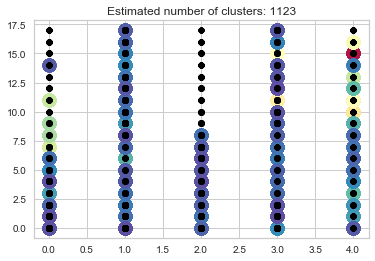

In [324]:
X = X_train.values
yy = y_train['Action Taken']


# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(yy, labels))
print("Completeness: %0.3f" % metrics.completeness_score(yy, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(yy, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(yy, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(yy, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()